In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
col_x = ['x1', 'x2', 'x3','x4','x5','x6','x7']
col_y = ['y']
X = pd.read_csv('1_x.csv', names=col_x)
Y = pd.read_csv('1_y.csv', names=col_y)
Y

,y
0,101.507602
1,-65.305680
2,152.189336
3,-109.702103
4,-11.188624
...,...
120,293.947002
121,-146.511266
122,-143.163481
123,-188.233401


In [ ]:
X.describe()

,x1,x2,x3,x4,x5,x6,x7
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,-0.046701,0.173034,0.049015,-0.005271,-0.095981,-0.107452,-0.056552
std,0.933281,0.928898,0.984631,1.000964,1.087336,0.928998,1.064615
min,-2.190258,-2.358885,-2.081062,-2.898741,-2.841371,-2.907825,-2.138552
25%,-0.775334,-0.429173,-0.657021,-0.685499,-0.869306,-0.672357,-0.936561
50%,0.030645,0.204892,-0.048617,0.054299,-0.102158,-0.174373,0.062705
75%,0.545665,0.755290,0.804735,0.659364,0.689661,0.531740,0.596198
max,2.092059,3.142216,2.272042,2.065050,2.660842,2.086050,3.026906


In [ ]:
Y.describe

<bound method NDFrame.describe of               y
0    101.507602
1    -65.305680
2    152.189336
3   -109.702103
4    -11.188624
..          ...
120  293.947002
121 -146.511266
122 -143.163481
123 -188.233401
124   76.381467

[125 rows x 1 columns]>

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      125 non-null    float64
 1   x2      125 non-null    float64
 2   x3      125 non-null    float64
 3   x4      125 non-null    float64
 4   x5      125 non-null    float64
 5   x6      125 non-null    float64
 6   x7      125 non-null    float64
dtypes: float64(7)
memory usage: 7.0 KB


In [ ]:
X.shape

(125, 7)

In [ ]:
X.corr()

,x1,x2,x3,x4,x5,x6,x7
x1,1.000000,0.095316,0.101514,-0.046790,-0.078087,0.067851,-0.084649
x2,0.095316,1.000000,-0.059840,-0.020476,0.057822,0.158545,-0.049618
x3,0.101514,-0.059840,1.000000,-0.128959,-0.114909,-0.001680,0.106153
x4,-0.046790,-0.020476,-0.128959,1.000000,-0.057467,0.023206,0.019905
x5,-0.078087,0.057822,-0.114909,-0.057467,1.000000,-0.144467,0.087428
x6,0.067851,0.158545,-0.001680,0.023206,-0.144467,1.000000,-0.029315
x7,-0.084649,-0.049618,0.106153,0.019905,0.087428,-0.029315,1.000000


In [ ]:
data = X
X['y'] = Y
X

,x1,x2,x3,x4,x5,x6,x7,y
0,1.599865,0.340598,-0.603400,0.150586,-0.209677,0.955045,0.347682,101.507602
1,1.472656,0.466832,-1.947130,0.625906,0.589354,0.753521,-2.138552,-65.305680
2,0.279378,-1.717121,0.251069,0.730013,0.301801,-0.206711,0.894811,152.189336
3,0.450771,1.133196,-0.294028,-2.595338,0.313911,1.953527,0.359938,-109.702103
4,1.507042,0.932115,-0.789549,1.043712,-1.404000,-0.124354,-0.921117,-11.188624
...,...,...,...,...,...,...,...,...
120,1.018825,1.618920,-1.561572,1.057171,1.893181,-0.647510,1.220188,293.947002
121,-1.244391,0.327816,-1.004231,-1.877654,1.307478,-1.839689,-0.176182,-146.511266
122,-1.968106,-0.054336,0.558046,-0.527741,-0.060449,0.531740,-0.374088,-143.163481
123,-0.970556,0.436830,0.877973,-0.970337,-0.282711,-1.464295,-0.976662,-188.233401


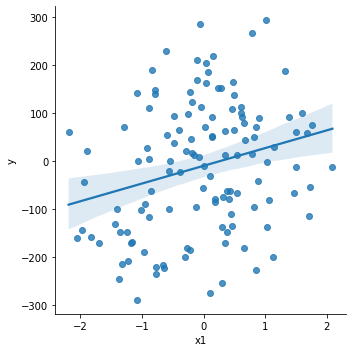

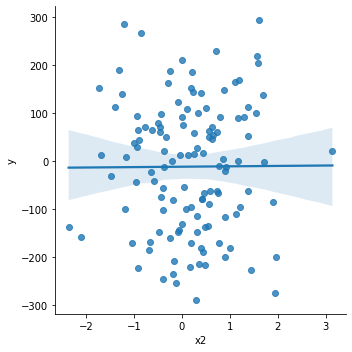

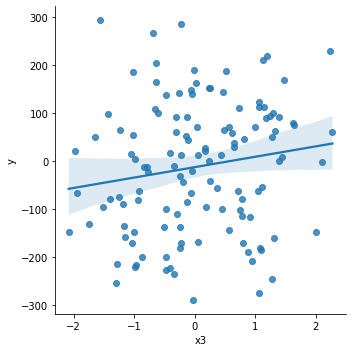

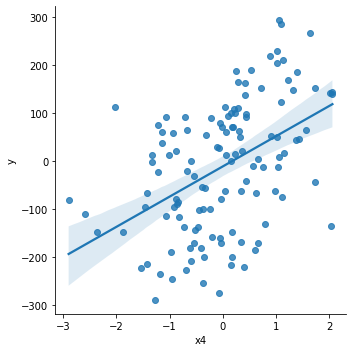

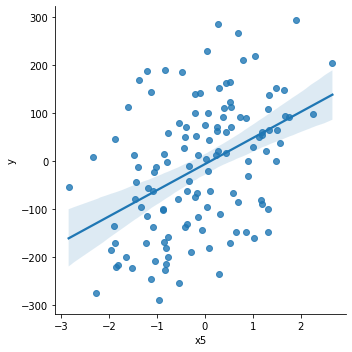

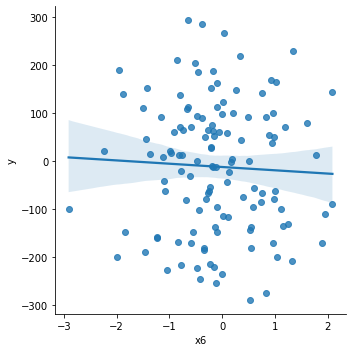

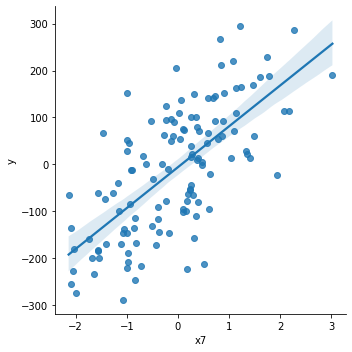

In [ ]:
def draw_1(items):
    return sns.lmplot(x= items, y ="y", data = data, palette= 'gist_heat')
for _ in range(X.shape[1]-1): # построим графики
    draw_1(X.columns[_])

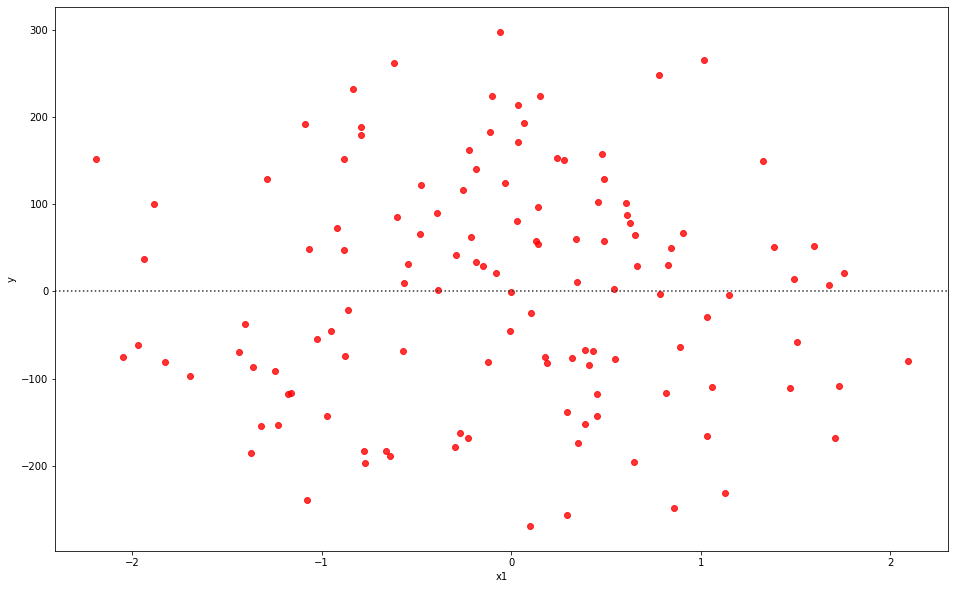

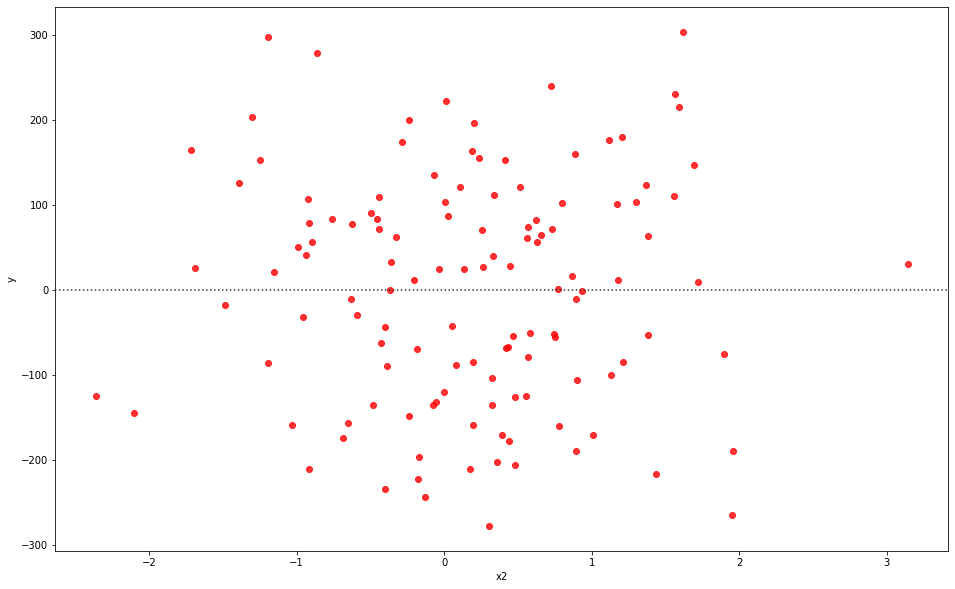

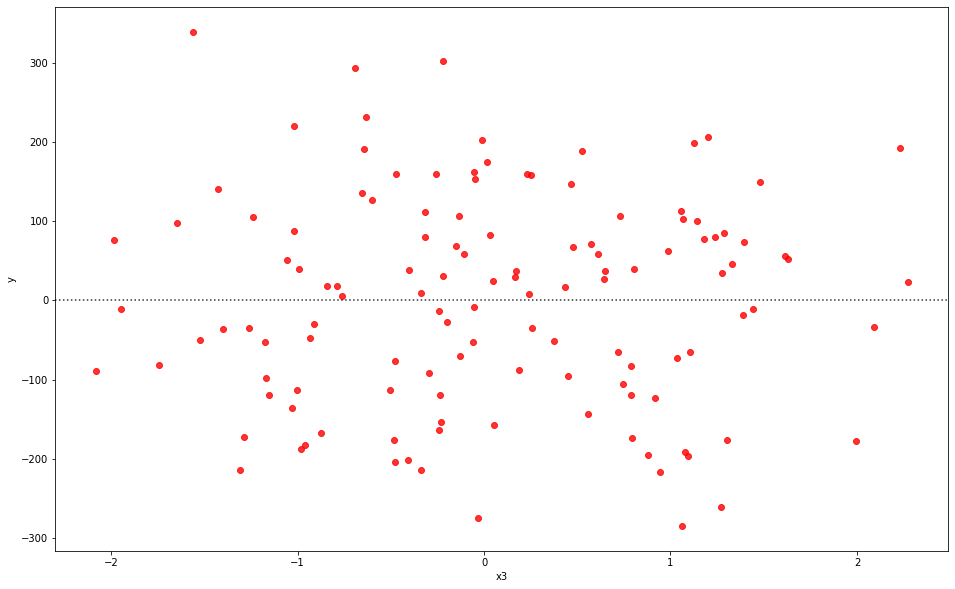

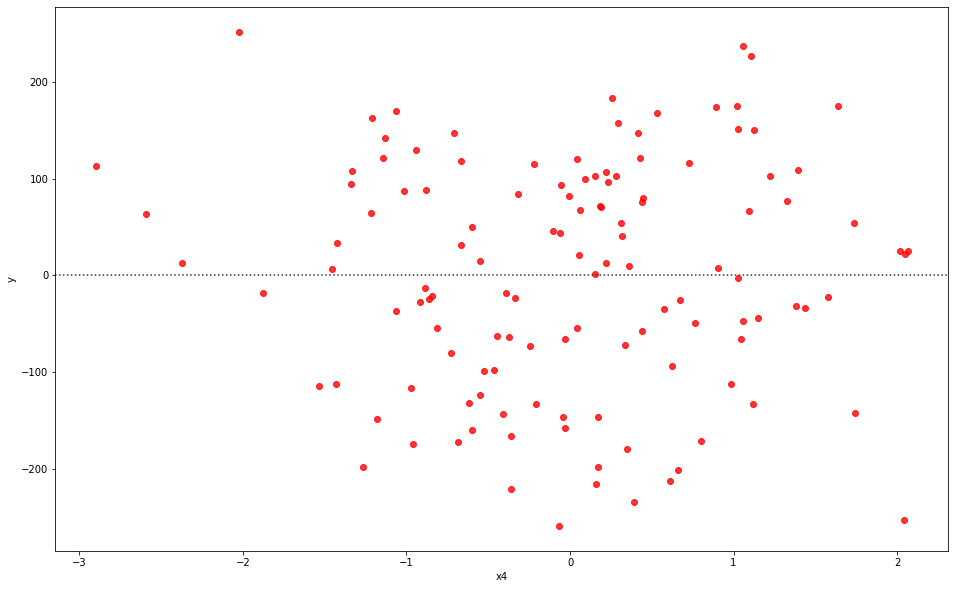

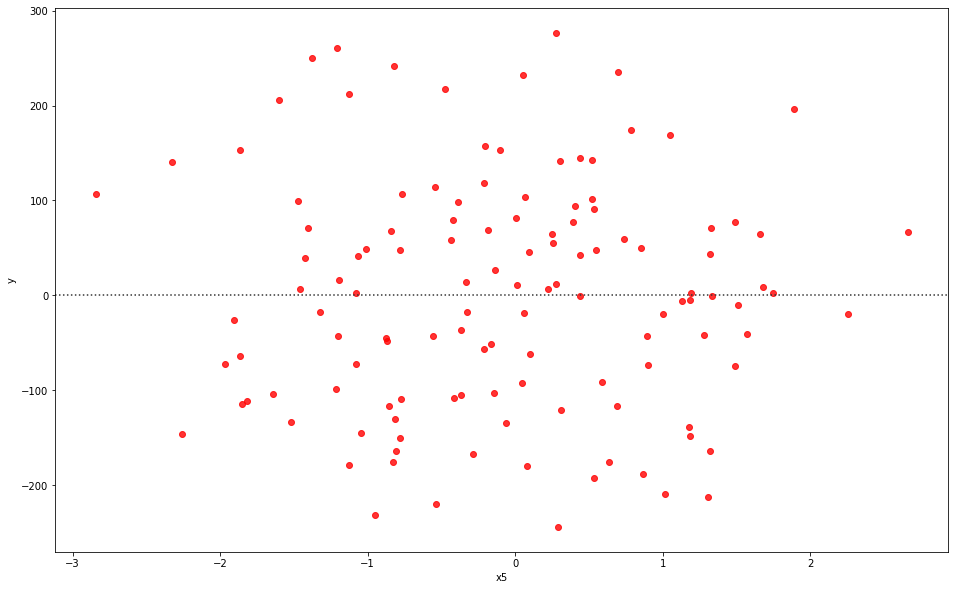

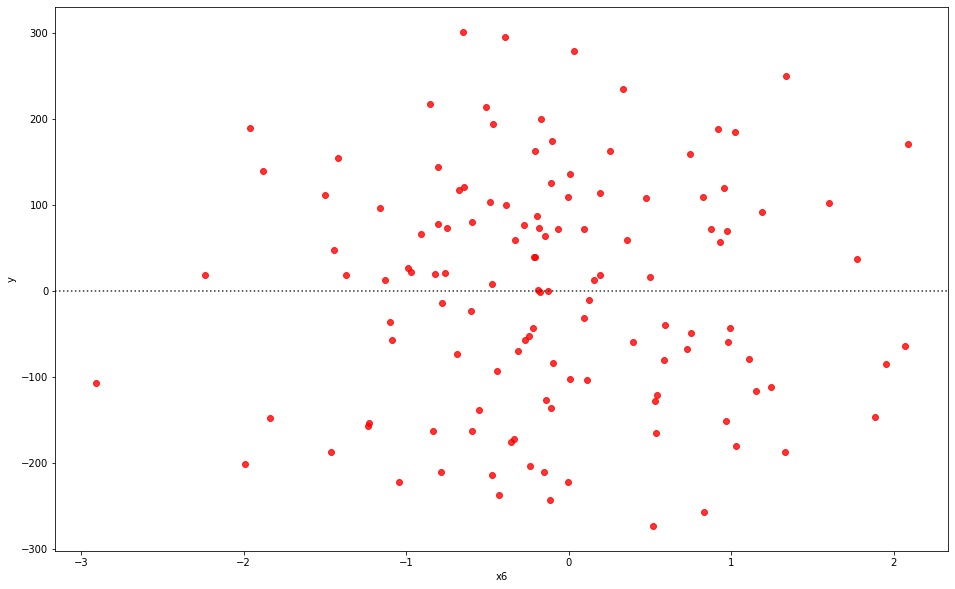

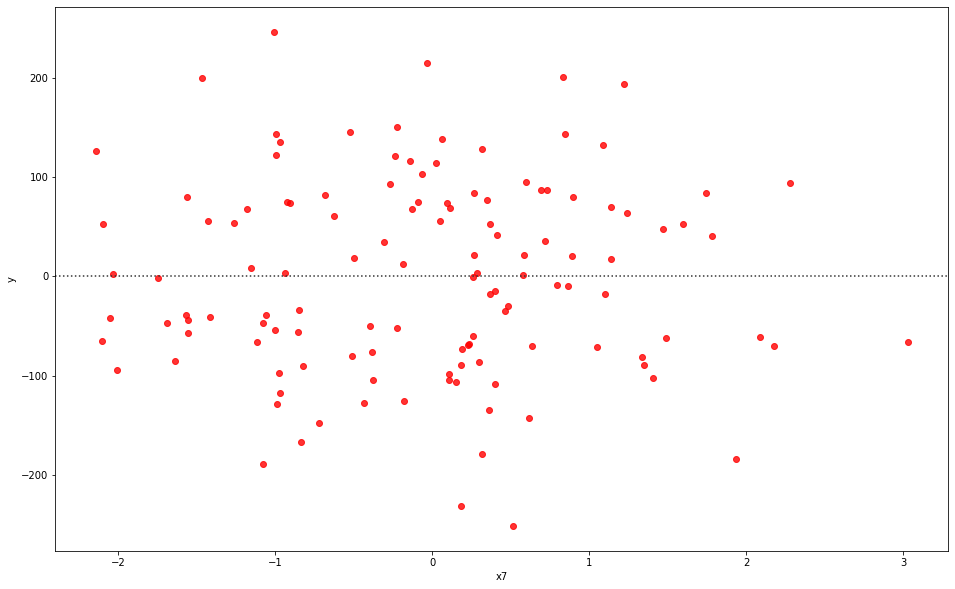

In [ ]:
def rec(vertical): #оцениваем простую линейную регрессию 
    f, ax = plt.subplots(figsize=(16, 10))
    sns.residplot(x=vertical, y= Y, data= data, color= 'r')
    return plt.show()
for _ in range(X.shape[1]-1):
    rec(X.columns[_])

In [ ]:
train, test = train_test_split(data, test_size=0.2)
train.shape, test.shape

((100, 8), (25, 8))

In [ ]:
train.head(5)

,x1,x2,x3,x4,x5,x6,x7,y
88,0.817002,0.198073,0.185429,-0.917996,-1.325619,0.589040,0.105398,-95.552521
87,-0.616426,0.721862,2.231714,1.023917,0.051823,1.335817,1.741704,229.569844
37,-0.005110,-0.401203,0.372650,-0.333930,-1.192777,0.592923,0.231436,-54.756993
41,0.665345,-0.898013,-0.105755,1.383266,0.091974,0.360983,-0.964908,44.948552
56,0.030645,-0.756333,0.988592,0.183499,0.548093,-0.593155,0.115081,72.438204


In [ ]:
train.head(5)

,x1,x2,x3,x4,x5,x6,x7,y
88,0.817002,0.198073,0.185429,-0.917996,-1.325619,0.589040,0.105398,-95.552521
87,-0.616426,0.721862,2.231714,1.023917,0.051823,1.335817,1.741704,229.569844
37,-0.005110,-0.401203,0.372650,-0.333930,-1.192777,0.592923,0.231436,-54.756993
41,0.665345,-0.898013,-0.105755,1.383266,0.091974,0.360983,-0.964908,44.948552
56,0.030645,-0.756333,0.988592,0.183499,0.548093,-0.593155,0.115081,72.438204


In [ ]:
x_train_mult = train[train.columns[:7]]
y_train = train[train.columns[7:]]
x_test_mult = test[train.columns[:7]]
y_test = test[train.columns[7:]]
x_train_mult.head(5)

,x1,x2,x3,x4,x5,x6,x7
88,0.817002,0.198073,0.185429,-0.917996,-1.325619,0.589040,0.105398
87,-0.616426,0.721862,2.231714,1.023917,0.051823,1.335817,1.741704
37,-0.005110,-0.401203,0.372650,-0.333930,-1.192777,0.592923,0.231436
41,0.665345,-0.898013,-0.105755,1.383266,0.091974,0.360983,-0.964908
56,0.030645,-0.756333,0.988592,0.183499,0.548093,-0.593155,0.115081


In [ ]:
y_train.head(5)

,y
88,-95.552521
87,229.569844
37,-54.756993
41,44.948552
56,72.438204


In [ ]:
def fit_model(x_train, x_test, y_train, y_test, column):
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    print('Признак:', column)
    print('Score:', model.score(x_test, y_test))
    print('Регрессия:', model.coef_)
    y_pred = model.predict(x_test)
    print(f'Метрика absolute_error: {metrics.mean_absolute_error(y_test, y_pred)}')
    print(f'Метрика squared_error: {metrics.mean_squared_error(y_test, y_pred)}')
    plt.scatter(y_test.index, y_test)
    plt.scatter(y_test.index, y_pred)
    plt.show() 

Признак: x1
Score: -0.031178346344357566
Регрссия: [[28.82595487]]
Метрика absolute_error: 120.41355506985617
Метрика squared_error: 18002.497886944722


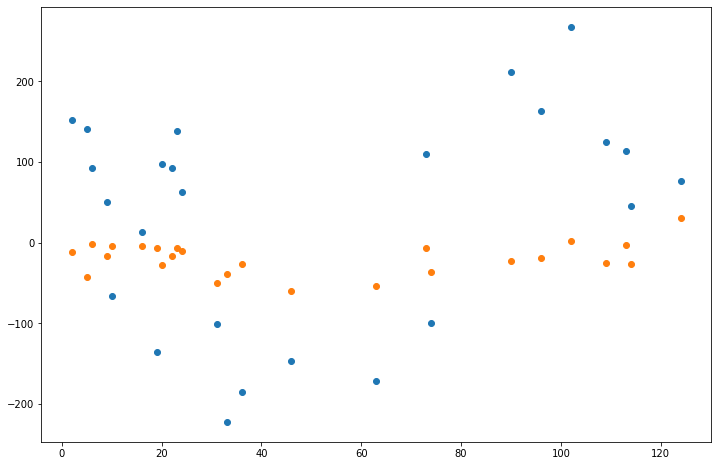

Признак: x2
Score: -0.1842866180178031
Регрссия: [[4.88389575]]
Метрика absolute_error: 131.42979283454898
Метрика squared_error: 20675.48975789165


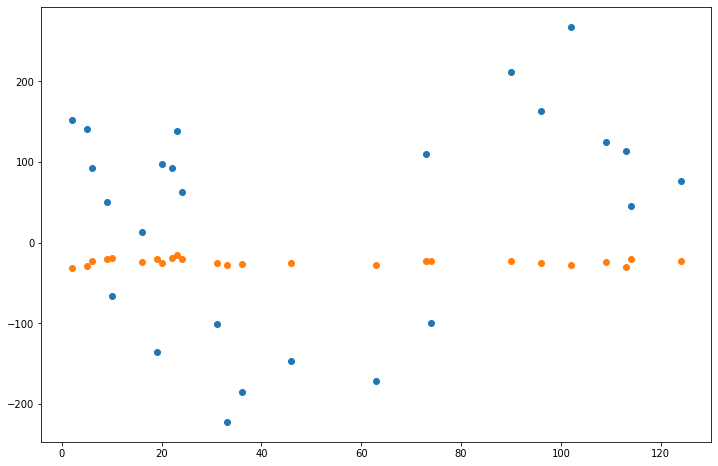

Признак: x3
Score: -0.12666626117641644
Регрссия: [[19.23793529]]
Метрика absolute_error: 126.0699087340131
Метрика squared_error: 19669.543157131997


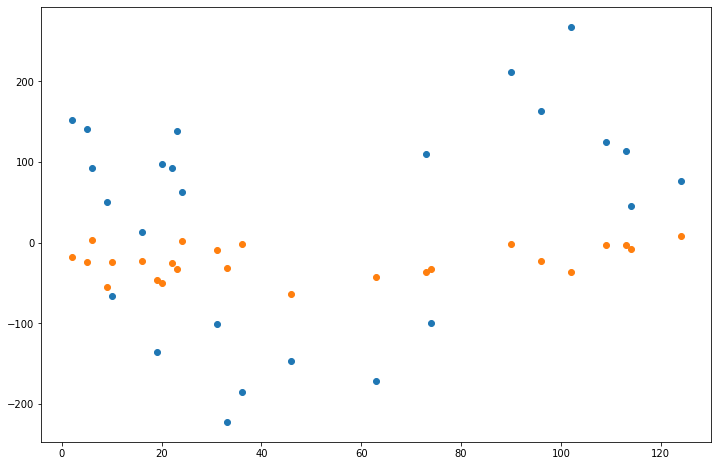

In [ ]:
for _ in X.columns[:3]:
    plt.subplots(figsize=(12, 8))
    fit_model(np.array(x_train_mult[_]).reshape(-1, 1), np.array(x_test_mult[_]).reshape(-1, 1), y_train, y_test, _)

In [ ]:
model_new= linear_model.LinearRegression(fit_intercept= True)
model_new.fit(x_train_mult, y_train)

LinearRegression()

In [ ]:
model_new.coef_ 

array([[50.33385236, -0.09540729, 23.69434472, 69.21886111, 56.64978059,
         0.43516731, 82.04207906]])

In [ ]:
model_new.intercept_

array([0.04155384])

In [ ]:
predictable_1= model_new.predict(x_test_mult)
print(predictable_1[:7])

[[   3.4576941 ]
 [-178.06373944]
 [ -93.56114848]
 [ 117.39417472]
 [ 137.43148696]
 [  99.52812528]
 [  96.33557557]]


In [ ]:
metrics.mean_absolute_error(y_test, predictable_1)

8.185167867678821

In [ ]:
metrics.mean_squared_error(y_test, predictable_1)

113.02074600503883

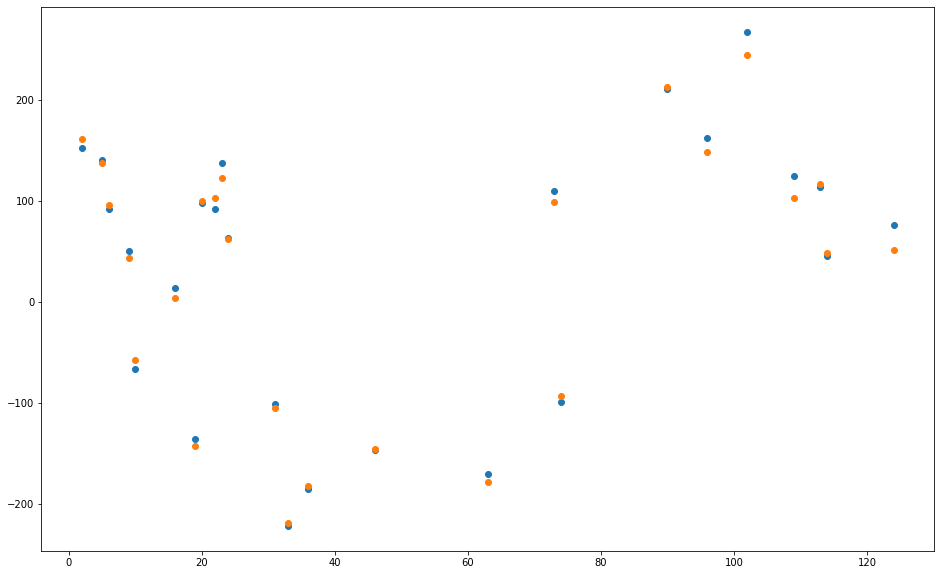

In [ ]:
plt.figure(figsize= (16, 10))
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, predictable_1)
plt.show()